### Import Libraries

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

# Spotify Attempt

### Import Data

In [ ]:
# Define path 

path = '/Volumes/2020-2021/CareerFoundry/Data Analytics Program/Achievement 6 Immersion/6 Immersion Project'

In [4]:
df = pd.read_csv(os.path.join(path,'02 Data','Original Data','Database to calculate popularity.csv'))

This data set it one that helped determine the popularity ranking in the spotify set I have been using. This set has dates and decided to use this since its a part of the spotify data I was using. Instead of popularity, I was going to use positions 

In [5]:
df.head()

,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [9]:
#artist frequency subset
top_artists=df['artist'].value_counts().rename_axis('unique_values').reset_index(name='counts')

In [10]:
top_artists.head()

,unique_values,counts
0,Ed Sheeran,218331
1,Post Malone,109687
2,Billie Eilish,103108
3,Drake,83456
4,XXXTENTACION,81645


In [19]:
df.shape

(9807001, 8)

In [20]:
df.columns

Index(['Unnamed: 0', 'country', 'date', 'position', 'uri', 'track', 'title',
       'artist'],
      dtype='object')

In [21]:
type(df)

pandas.core.frame.DataFrame

ConversionError: Failed to convert value(s) to axis units: array(['Global', 'Global', 'Global', ..., 'Taiwan', 'Taiwan', nan],
      dtype=object)

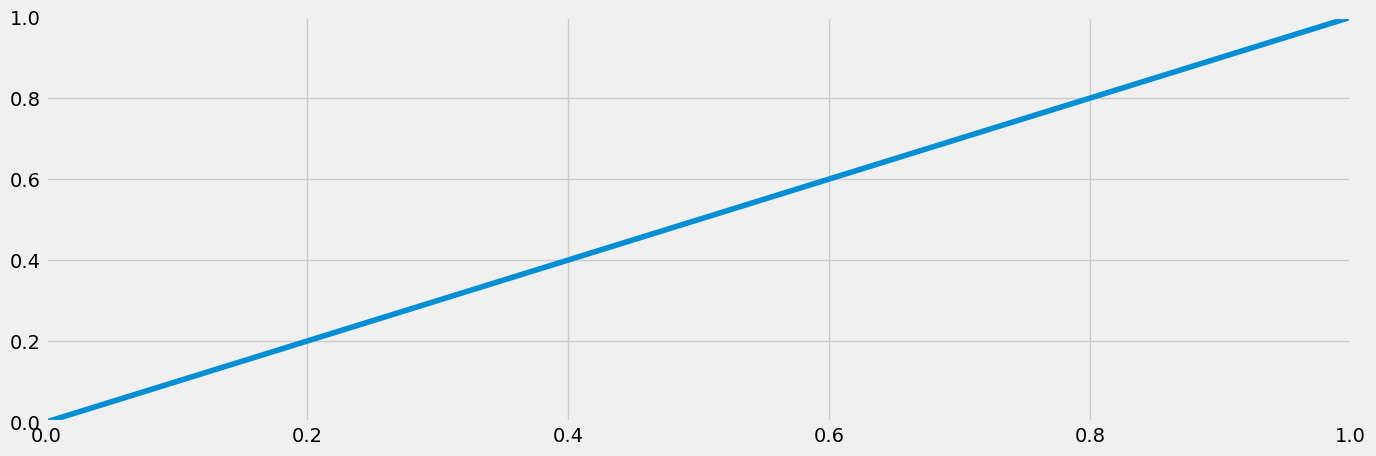

In [23]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df)

AttributeError: 'DataFrame' object has no attribute 'column'

In [26]:
# Reset index so that you can use the "Date" column as a filter

df_2 = df.reset_index()

In [27]:
df_2.head()

,index,Unnamed: 0,country,date,position,uri,track,title,artist
0,0,0,Global,05/11/2020,1.0,https://open.spotify.com/track/47EiUVwUp4C9fGc...,"Dakiti , Bad Bunny, Jhay Cortez",Dakiti,"Bad Bunny, Jhay Cortez"
1,1,1,Global,05/11/2020,2.0,https://open.spotify.com/track/35mvY5S1H3J2QZy...,"positions , Ariana Grande",positions,Ariana Grande
2,2,2,Global,05/11/2020,3.0,https://open.spotify.com/track/3tjFYV6RSFtuktY...,"Mood , 24kGoldn",Mood,24kGoldn
3,3,3,Global,05/11/2020,4.0,https://open.spotify.com/track/7hxHWCCAIIxFLCz...,"Lemonade , Internet Money",Lemonade,Internet Money
4,4,4,Global,05/11/2020,5.0,https://open.spotify.com/track/4y4spB9m0Q6026K...,"Lonely , Justin Bieber",Lonely,Justin Bieber


In [37]:
df_sub = df_2.loc[(df_2['date'] >= '12/01/2016') & (df_2['date'] < '12/01/2020')]

In [38]:
df_sub.shape

(21000, 9)

In [39]:
df_sub.head()

,index,Unnamed: 0,country,date,position,uri,track,title,artist
132600,132600,132600,Global,12/01/2019,1.0,https://open.spotify.com/track/3KkXRkHbMCARz0a...,Sunflower - Spider-Man: Into the Spider-Verse...,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
132601,132601,132601,Global,12/01/2019,2.0,https://open.spotify.com/track/6MWtB6iiXyIwun0...,"Wow. , Post Malone",Wow.,Post Malone
132602,132602,132602,Global,12/01/2019,3.0,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next , Ariana Grande",thank u,"next , Ariana Grande"
132603,132603,132603,Global,12/01/2019,4.0,https://open.spotify.com/track/5p7ujcrUXASCNwR...,"Without Me , Halsey",Without Me,Halsey
132604,132604,132604,Global,12/01/2019,5.0,https://open.spotify.com/track/4w8niZpiMy6qz1m...,"Taki Taki , DJ Snake",Taki Taki,DJ Snake


In [41]:
# Set the "Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['date']) # Create a datetime column from "Date.""
df_sub = df_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
df_sub.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
df_sub.head()

,index,Unnamed: 0,country,position,uri,track,title,artist
datetime,,,,,,,,
2019-12-01,132600,132600,Global,1.0,https://open.spotify.com/track/3KkXRkHbMCARz0a...,Sunflower - Spider-Man: Into the Spider-Verse...,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee"
2019-12-01,132601,132601,Global,2.0,https://open.spotify.com/track/6MWtB6iiXyIwun0...,"Wow. , Post Malone",Wow.,Post Malone
2019-12-01,132602,132602,Global,3.0,https://open.spotify.com/track/2rPE9A1vEgShuZx...,"thank u, next , Ariana Grande",thank u,"next , Ariana Grande"
2019-12-01,132603,132603,Global,4.0,https://open.spotify.com/track/5p7ujcrUXASCNwR...,"Without Me , Halsey",Without Me,Halsey
2019-12-01,132604,132604,Global,5.0,https://open.spotify.com/track/4w8niZpiMy6qz1m...,"Taki Taki , DJ Snake",Taki Taki,DJ Snake


ConversionError: Failed to convert value(s) to axis units: array(['Global', 'Global', 'Global', ..., 'Taiwan', 'Taiwan', 'Taiwan'],
      dtype=object)

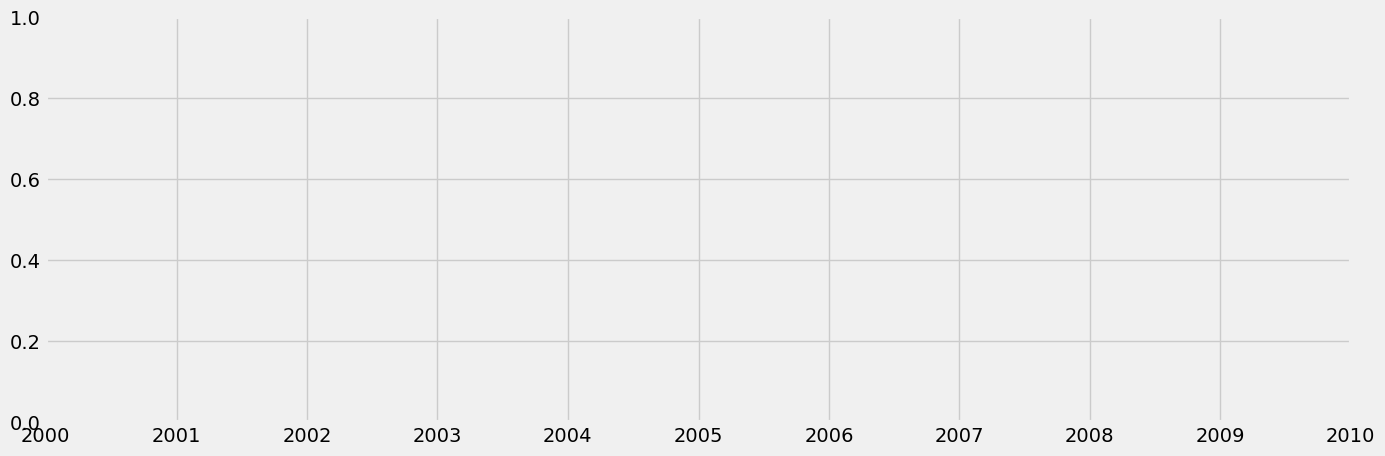

In [42]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_sub)

I tried the spotify information and it didnt work out as I thought. So I pulled data from the Quandl site as well to do the task this way. I found some Inflation data in the US that I thought was interesting to look into.

# USA Inflation Data from Quandl 

## Import Data

In [43]:
# Configure API key 

quandl.ApiConfig.api_key = 'cuW9891pfzgiQAowzd8s'

In [47]:
# Importing the Rate of Inflation  "Customer Price Index- USA" variable.

df_3 = quandl.get('RATEINF/CPI_USA')

In [48]:
df_3.head(5)

,Value
Date,
1913-01-31,9.8
1913-02-28,9.8
1913-03-31,9.8
1913-04-30,9.8
1913-05-31,9.7


In [49]:
df_3.shape

(1302, 1)

In [50]:
df_3.columns

Index(['Value'], dtype='object')

In [51]:
type(df_3)

pandas.core.frame.DataFrame

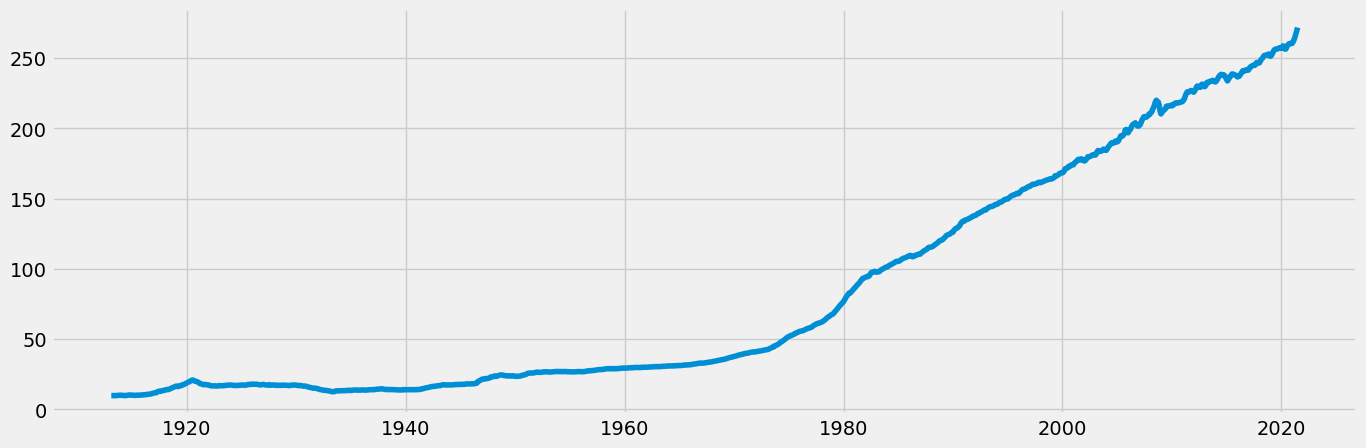

In [52]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) # The dpi argument controls the quality of the visualization here. When it's set to 100,
# it will produce lower-than-standard quality, which is useful if, similar to this notebook, you'll have a lot of plots.
# A large number of plots will increase the size of the notebook, which could take more time to load and eat up a lot of RAM!

plt.plot(df_3)

### Subsetting, wrangling, and cleaning time-series data

In [54]:
# Reset index so that you can use the "Date" column as a filter

data = df_3.reset_index()

In [55]:
data.head()

,Date,Value
0,1913-01-31,9.8
1,1913-02-28,9.8
2,1913-03-31,9.8
3,1913-04-30,9.8
4,1913-05-31,9.7


In [58]:
data_sub = data.loc[(data['Date'] >= '2000-01-01') & (data['Date'] < '2021-06-30')]

I decided to create a subset to limit the amount of years to 21 years to get a closer look of the trends that are more recent rather than the 1900's

In [59]:
data_sub.shape

(257, 2)

In [60]:
data_sub.head()

,Date,Value
1044,2000-01-31,168.8
1045,2000-02-29,169.8
1046,2000-03-31,171.2
1047,2000-04-30,171.3
1048,2000-05-31,171.5


In [61]:
# Set the "Date" column as the index

from datetime import datetime

data_sub['datetime'] = pd.to_datetime(data_sub['Date']) # Create a datetime column from "Date.""
data_sub = data_sub.set_index('datetime') # Set the datetime as the index of the dataframe.
data_sub.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
data_sub.head()

,Value
datetime,
2000-01-31,168.8
2000-02-29,169.8
2000-03-31,171.2
2000-04-30,171.3
2000-05-31,171.5


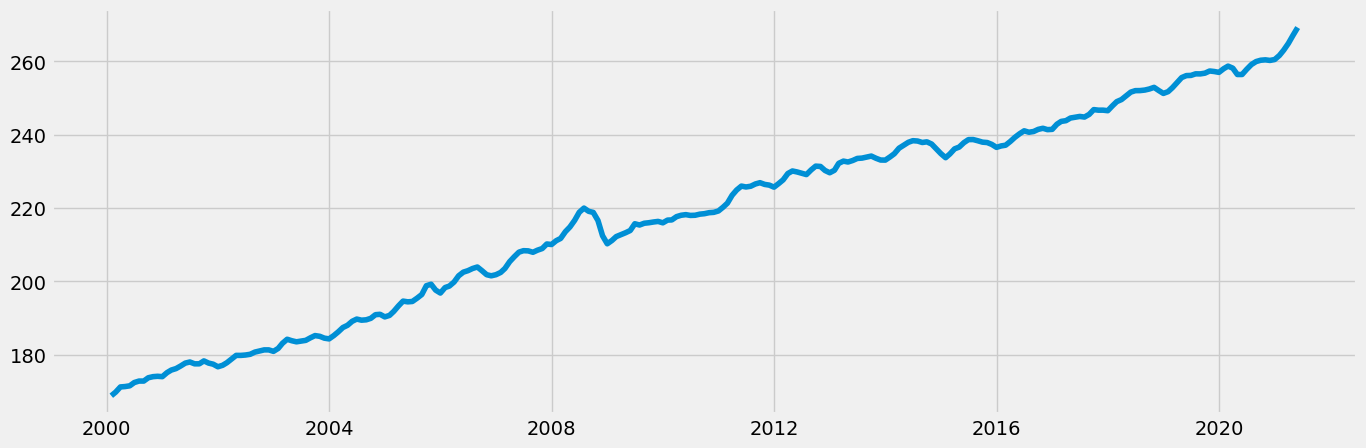

In [62]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_sub)

In [63]:
# Check for missing values 

data_sub.isnull().sum() 

Value    0
dtype: int64

In [64]:
# Check for duplicates

dups = data_sub.duplicated()
dups.sum()

# 10

10

In [92]:
dups.dropna(inplace = True)

In [93]:
dups.isnull().sum() 

0

### Time Series Analysis : Decomposition

In [94]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(dups, model='additive')

In [95]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

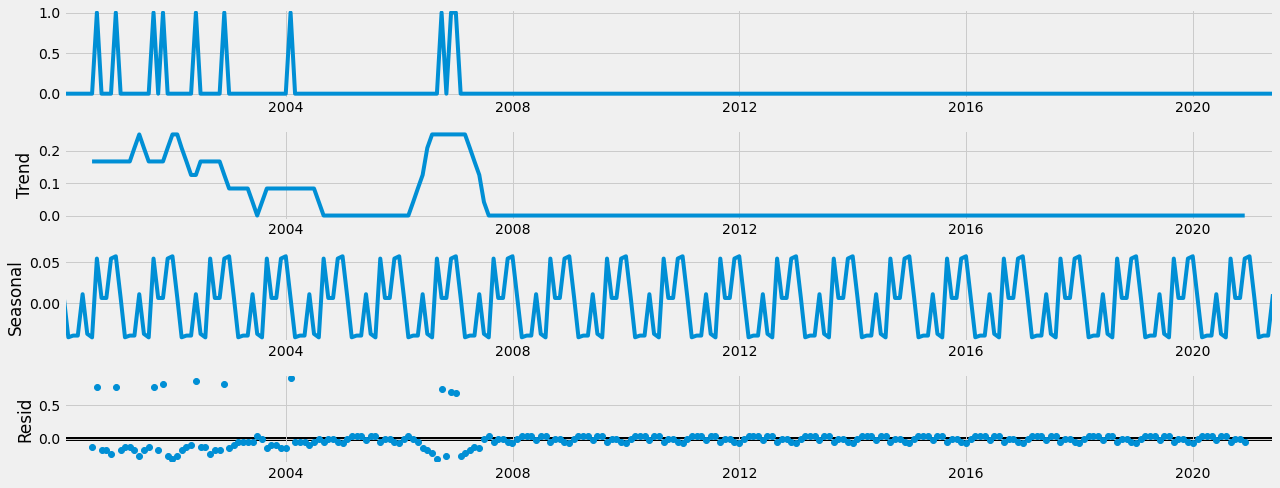

In [96]:
# Plot the separate components

decomposition.plot()
plt.show()

The trend lines are similar after 2008. The seasonailty looks consistent throught out all the years charted. The risidual looks also the same from 2008 on as well. Looks like there are a few inconsistencies from 2000-2008 in all charts but the seasonality. There was a big financial criss in 2008, so it makes sense that after 2008, things changed.

### Testing for stationary

In [98]:
dups=data_sub_2

In [99]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data_sub_2['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                  -0.371000
p-value                          0.914829
Number of Lags Used              5.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


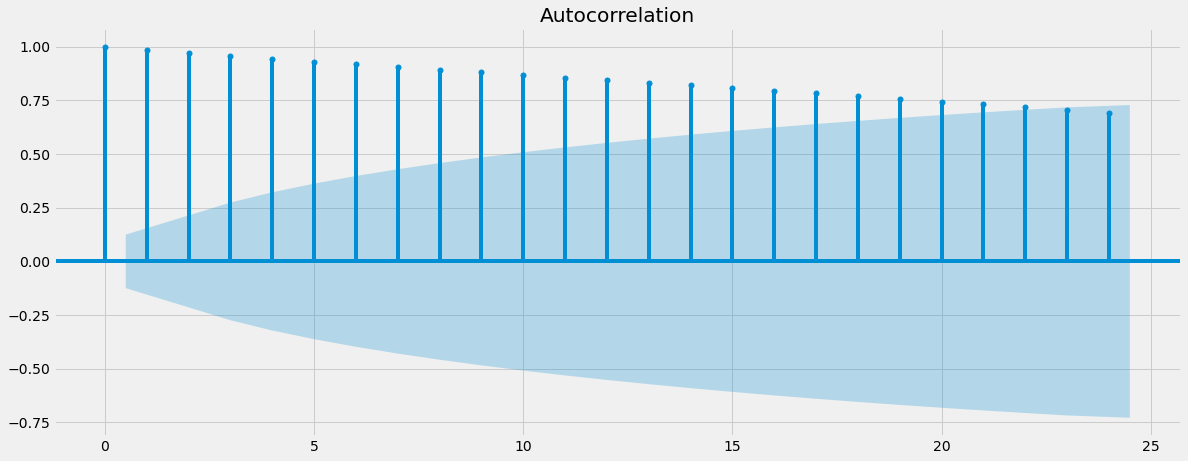

In [100]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(data_sub_2)
plt.show()

P value is more than .5 & the test statistic is -0.37, which means this data is non stationary. 

### Stationarizing the Inflation Data

In [101]:
data_diff = data_sub_2 - data_sub_2.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [102]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [103]:
data_diff.head()

,Value
datetime,
2000-02-29,1.0
2000-03-31,1.4
2000-04-30,0.1
2000-05-31,0.2
2000-06-30,0.9


In [104]:
data_diff.columns

Index(['Value'], dtype='object')

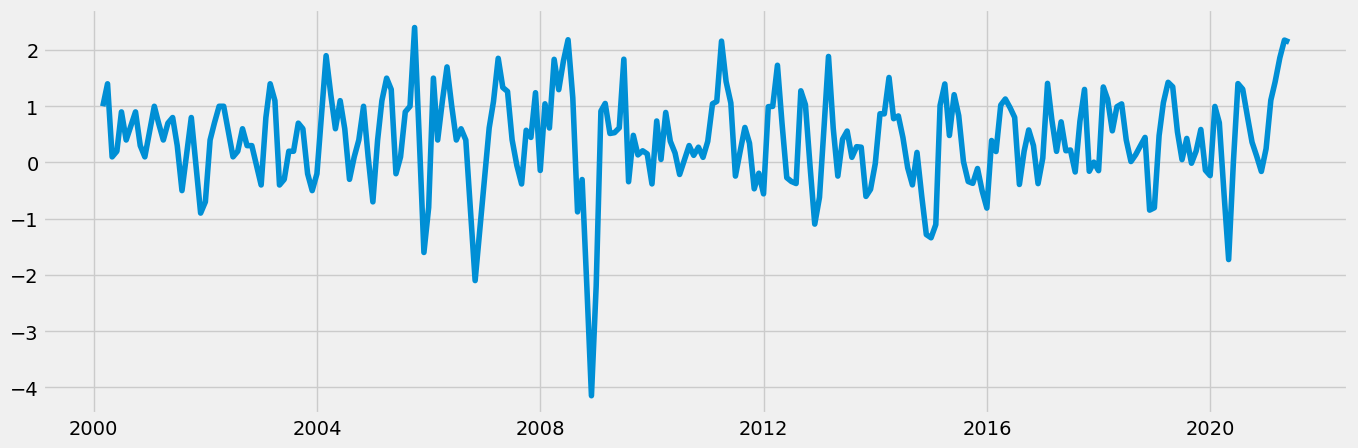

In [105]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [106]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -7.915089e+00
p-value                        3.855290e-12
Number of Lags Used            4.000000e+00
Number of Observations Used    2.410000e+02
Critical Value (1%)           -3.457779e+00
Critical Value (5%)           -2.873609e+00
Critical Value (10%)          -2.573202e+00
dtype: float64


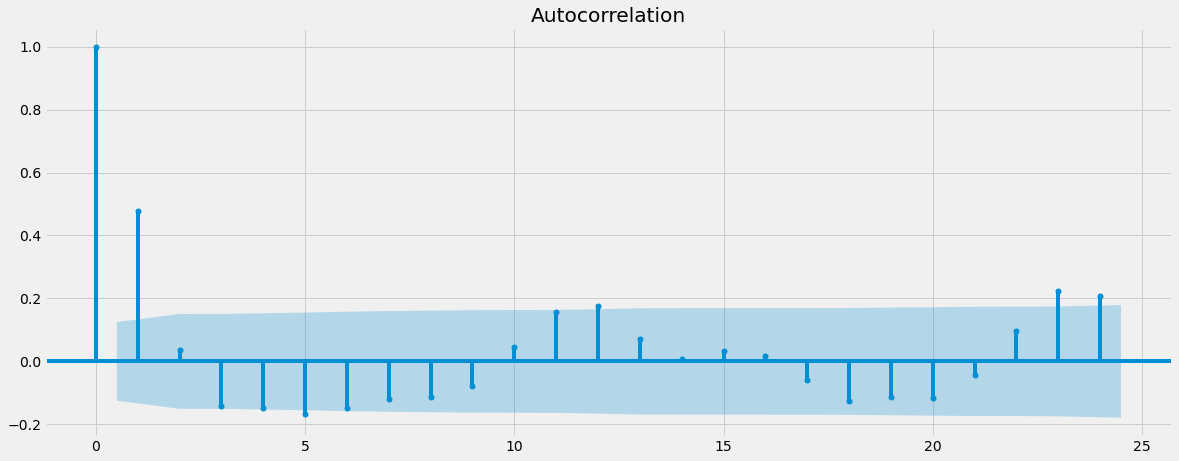

In [107]:
plot_acf(data_diff)
plt.show()